# Redes Neurais Artificiais - Projeto Prático 2.1
## Aprendizado Supervisionado do Neurônio Perceptron



Importação das bibliotecas basicas.


In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable

Calculando o identificador de exemplos

In [3]:
matriculas = [
    1815080004, # Eduardo
    2315310019, # Oziel
    2315310020 # Pedro
]
identificador = sum([matricula % 10 for matricula in matriculas]) % 4
identificador

1

### Parte 1 - Resolvendo um Problema Linearmente Separável

Lendo dados de entrada

In [4]:
dados = np.fromfile('dataAll.txt', dtype=float)
dados = dados.reshape((-1, 3)) # Ler dados de entrada em forma de matriz de 3 colunas
dados

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

In [5]:
dados.shape

(1000, 3)

Gerando os pesos inciais

In [6]:
pesos = np.random.uniform(-0.5, 0.5, 2) # Gerando pesos uniformemente
pesos

array([0.19954154, 0.36509248])

Executando até convergência

In [30]:
def funcao_degrau(x):
    if x < 0: return 0
    return 1
def soma(x, peso):
    resultado = 0
    for i in range(len(x)):
        resultado += x[i] * peso[i]
    return resultado

n = 0.1 # Taxa de Aprendizado
erros = 1
print("Pesos Iniciais: ",pesos)
epoca = 0
total_ajustes = 0
while(erros != 0):
    erros = 0
    for i in range(len(dados)):
        x = dados[i][0:2]
        y = dados[i][2]
        y_prev = funcao_degrau(soma(x, pesos))
        erro = y - y_prev
        erros += abs(erro)
        if erro != 0:
            pesos += n * erro * x  # atualização vetorizada
            total_ajustes += 1
    print("Época %02d: Erros: %03d Pesos:"%(epoca, erros), pesos)
    epoca += 1
print("\nTotal de Ajustes de Pesos:",total_ajustes)
print("Quantidade de Épocas até Convergência:",epoca)


Pesos Iniciais:  [-0.03958639  0.00196689]
Época 00: Erros: 024 Pesos: [ 218.76295361 -217.73028311]
Época 01: Erros: 020 Pesos: [ 328.50069361 -254.32864311]
Época 02: Erros: 011 Pesos: [ 323.36944361 -323.50887311]
Época 03: Erros: 000 Pesos: [ 323.36944361 -323.50887311]

Total de Ajustes de Pesos: 55
Quantidade de Épocas até Convergência: 4


Desenhando o gráfico com os pontos e reta separadora

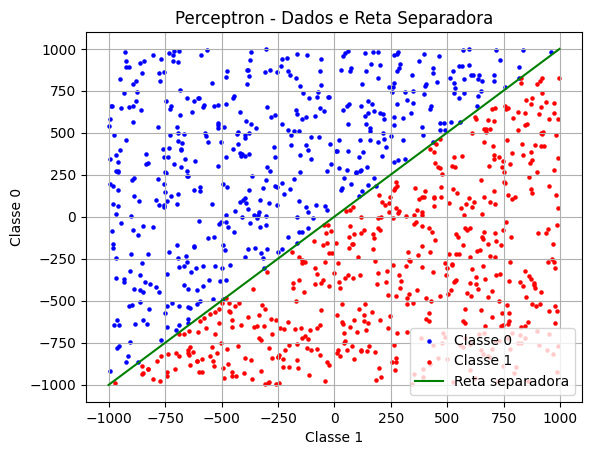

In [8]:
# Plotando os pontos no gráfico, 0 em azul e 1 em vermelho
for classe in [0, 1]:
    idx = dados[:, 2] == classe
    if classe == 0: cor, label = 'blue', 'Classe 0'
    else:           cor, label = 'red', 'Classe 1'
    plt.scatter(dados[idx, 0], dados[idx, 1], c=cor, label=label, s=5)

# Criar a reta separadora
x_vals = np.linspace(np.min(dados[:, 0])-1, np.max(dados[:, 0])+1, 200)
if pesos[1] != 0:
    y_vals = -(pesos[0] * x_vals) / pesos[1]
    plt.plot(x_vals, y_vals, 'green', label='Reta separadora')
else: # Reta é vertical
    x_vert = 0
    plt.axvline(x=x_vert, color='green', label='Reta separadora')

plt.xlabel('Classe 1')
plt.ylabel('Classe 0')
plt.title('Perceptron - Dados e Reta Separadora')
plt.legend()
plt.grid(True)
plt.show()

### Parte 2 - Experimentação

Importando Dados

In [25]:
# p2 = Parte 2
dados_p2 = np.fromfile('data1.txt', dtype=float)
dados_p2 = dados_p2.reshape((-1, 3)) # Ler dados de entrada em forma de matriz de 3 colunas
dados_p2

array([[ 0.13658687, -0.16460088,  0.        ],
       [-0.0228559 , -0.01094684,  0.        ],
       [-0.02654897,  0.00582183,  0.        ],
       ...,
       [ 0.99007304,  0.8921047 ,  1.        ],
       [ 0.91691441,  1.15684083,  1.        ],
       [ 0.99252852,  1.06937678,  1.        ]])

In [26]:
dados_p2.shape

(600, 3)

Definindo Configurações

In [27]:
n_p2 = [0.4, 0.1, 0.01]
intervalo = [(-100,+ 100),(-0.5,+ 0.5)]

Executando o Experimento

In [35]:
resultados = {} # Dicionário para armazenar todos os resultados

for n in n_p2:
  print("Taxa de Aprendizado: ", n)

  for inter in intervalo:
    print("Intervalo: ", inter)
    menor_num_epocas = float('inf') # Maior valor possível para depois comparar
    conj_total_ajustes = []

    for rep in range(10):
      print("Repetição: ", rep)

      pesos = np.random.uniform(inter[0], inter[1], 3) # Adicionando um bias
      print("Pesos: ", pesos)

      erros = 1
      epoca = 0
      total_ajustes = 0

      while(erros != 0):
        erros = 0
        for i in range(len(dados_p2)):
          x = np.insert(dados_p2[i][0:2], 0, 1)  # x0 = 1 para bias
          y = dados_p2[i][2]
          y_prev = funcao_degrau(soma(x, pesos))
          erro = y - y_prev
          erros += abs(erro)
          if erro != 0:
            pesos += n * erro * x  # atualização vetorizada
            total_ajustes += 1
        print("Época: %d, Erros: %d, Pesos:"%(epoca, erros), pesos)
        epoca += 1

      if(epoca < menor_num_epocas):
        menor_num_epocas = epoca

      conj_total_ajustes.append(total_ajustes)

    media_total_ajustes = np.mean(conj_total_ajustes)
    dp_total_ajustes = np.std(conj_total_ajustes)
    resultados[(n, tuple(inter))] = (menor_num_epocas, media_total_ajustes, dp_total_ajustes)

A saída de streaming foi truncada nas últimas 5000 linhas.
Época: 364, Erros: 2, Pesos: [-61.41552955  48.61257963  25.38581545]
Época: 365, Erros: 2, Pesos: [-61.41552955  48.60862601  25.39297926]
Época: 366, Erros: 2, Pesos: [-61.41552955  48.60467239  25.40014307]
Época: 367, Erros: 2, Pesos: [-61.41552955  48.60071877  25.40730688]
Época: 368, Erros: 2, Pesos: [-61.41552955  48.59676515  25.41447069]
Época: 369, Erros: 2, Pesos: [-61.41552955  48.59281152  25.4216345 ]
Época: 370, Erros: 1, Pesos: [-61.40552955  48.60078     25.43016716]
Época: 371, Erros: 2, Pesos: [-61.40552955  48.59682638  25.43733097]
Época: 372, Erros: 2, Pesos: [-61.40552955  48.59287276  25.44449478]
Época: 373, Erros: 2, Pesos: [-61.40552955  48.58891914  25.45165859]
Época: 374, Erros: 2, Pesos: [-61.40552955  48.58496552  25.45882241]
Época: 375, Erros: 2, Pesos: [-61.40552955  48.5810119   25.46598622]
Época: 376, Erros: 1, Pesos: [-61.39552955  48.58898037  25.47451887]
Época: 377, Erros: 2, Pesos: [-

Apresentando Resultados

In [44]:
tabela = PrettyTable()
tabela.field_names = ["Taxa de Aprendizado (η)",
                      "Intervalo de Pesos",
                      "Média Total de Ajustes ± Desvio Padrão",
                      "Menor Número de Épocas"]

for chave, valores in resultados.items():
    n = chave[0]
    inter = chave[1]  # tuple(inter)
    menor_epocas = valores[0]
    media_ajustes = valores[1]
    dp_ajustes = valores[2]

    tabela.add_row([
        f"{n:g}",
        f"[{inter[0]}, {inter[1]}]",
        f"{media_ajustes:.2f} ± {dp_ajustes:.2f}",
        menor_epocas
    ])

print(tabela)

+-------------------------+--------------------+----------------------------------------+------------------------+
| Taxa de Aprendizado (η) | Intervalo de Pesos | Média Total de Ajustes ± Desvio Padrão | Menor Número de Épocas |
+-------------------------+--------------------+----------------------------------------+------------------------+
|           0.4           |    [-100, 100]     |            312.30 ± 136.34             |           3            |
|           0.4           |    [-0.5, 0.5]     |             47.40 ± 14.33              |           13           |
|           0.1           |    [-100, 100]     |            1570.40 ± 965.13            |           6            |
|           0.1           |    [-0.5, 0.5]     |             34.80 ± 19.59              |           4            |
|           0.01          |    [-100, 100]     |           13975.90 ± 8003.70           |           69           |
|           0.01          |    [-0.5, 0.5]     |             82.30 ± 44.97      

**Discussão de Resultados**

Para as Taxas de Aprendizado utilizadas:
- η = 0.4 apresentou um bom equilíbro em tanto sua média quanto desvio padrão para ambos os intervalos de pesos, além de ter tanto a segunda menor e quanto a segunda maior quantidade de épocas do experimento;
- η = 0.1 foi a taxa que teve a menor quantidade de épocas para ambos os intervalos de peso, no entanto, teve uma diferença significativa entre a média de ajustes e seu desvio padrão para os dois intervalos;
- η = 0.01 demonstrou os resultados mais discrepantes, tendo simultâneamente a maior e menor quantidade de épocas em seu treinamento, porém, teve a maior média de ajustes e desvio padrão para ambos os intervalos.

Conclui-se que uma Taxa de Aprendizado muito baixa torna o treinamento mais lento devido a grande quantidade de ajustes necessários para se atingir o resultado desejado, enquanto uma taxa maior acelera o processo de convergência e, consequentemente, de treinamento.

Para os Intervalos de Peso:
- Intervalos maiores possibilitam a geração de pesos maiores, que podem dificultar o treinamento do modelo, especialmente para Taxas de Aprendizado menores;
- Intervalos menores apresentaram médias e desvios padrões menores, indicando que pesos iniciais mais próximos de zero ajudam a convergir.

Portanto, Intervalos menores melhora a performance e estabilidade do treinamento, enquanto Intervalos maiores aumentam a variabilidade e podem comprometer o processamento.

A melhor configuração apresentada nesse experimento foi Taxa de Aprendizado = 0.1 e Intervalo de Pesos (-0.5, 0.5), onde foi apresentada uma excelente combinação de Média e Desvio Padrão baixos com um pequeno Número de Épocas necessárias para convergir.

A pior configuração apresentada nesse experimento foi Taxa de Aprendizado = 0.01 e Intervalo de Pesos (-100, 100), onde foram apresentados valores insatisfatórios, contendo os maiores valores em todo o treinamento para as métricas de Média de Ajustes, Desvio Padrão de Ajustes e Número de Épocas.